In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report ,precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import random
from IPython import display


🌾 Crop Classification Dataset (Synthetic)
--
This is a synthetic dataset with 1500 samples and 5 crop types, generated using make_blobs() for classification tasks.

📊 Features:
Rainfall (mm) – X-axis

Temperature (°C) – Y-axis

🌱 Crop Types (Classes):
Wheat (1)

Rice (2)

Maize (3)

Barley (4)

Sugarcane (5)

⚙️ Dataset Info:
Generated using:

cluster_std = 4.5

center_box = (20, 80)

Split into training (80%) and test (20%) sets.

<ipython-input-2-256e3d02eebd>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.get_cmap('plasma', nc), marker='o', s=20)


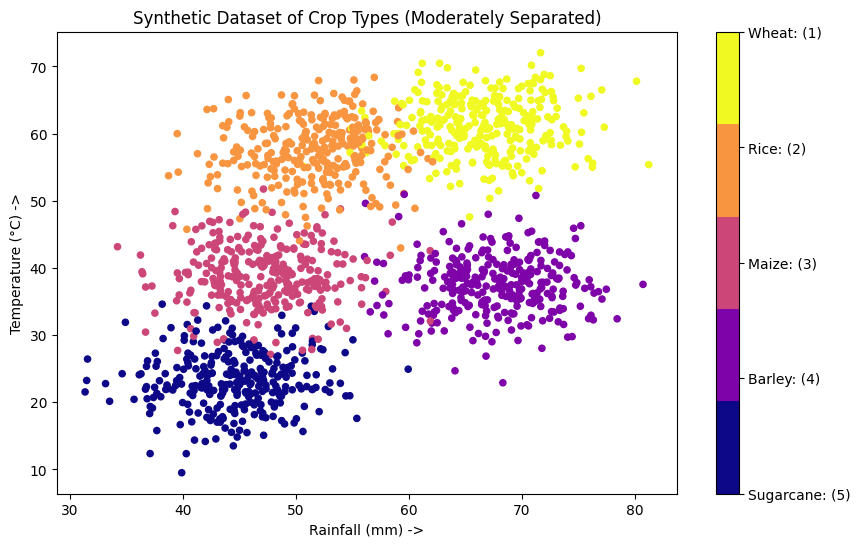

In [2]:
np.random.seed(0)

ns = 1500
nf = 2
nc = 5
rs = 40

x, y = make_blobs(n_samples=ns, n_features=nf, centers=nc,
                  cluster_std=4.5,
                  center_box=(20, 80),
                  random_state=rs)

x = abs(x)
y = abs(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

classNames = ['Wheat: (1)', 'Rice: (2)', 'Maize: (3)', 'Barley: (4)', 'Sugarcane: (5)']
plt.figure(figsize=(10,6))
scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.get_cmap('plasma', nc), marker='o', s=20)
# plt.xlim(1, 200)
# plt.ylim(1, 30)
cbar = plt.colorbar(scatter, ticks=range(nc))
cbar.set_ticklabels(classNames[::-1])
plt.title('Synthetic Dataset of Crop Types (Moderately Separated)')
plt.xlabel('Rainfall (mm) ->')
plt.ylabel('Temperature (°C) ->')

plt.show()

**📊 Data Splits:**
--
x_train: The training features. It contains the environmental data (Rainfall and Temperature) for the training set.

y_train: The training labels. It contains the crop types (labels) corresponding to the training features.

x_test: The test features. It contains the environmental data for the test set, which is used to evaluate the model's performance.

y_test: The test labels. It contains the crop types (labels) corresponding to the test features. This is used for model evaluation.

In [3]:
x_train

array([[38.2546421 , 29.49330195],
       [50.04285438, 17.54549715],
       [47.17740496, 24.48595371],
       ...,
       [48.00487048, 55.8209188 ],
       [54.62027007, 52.42838118],
       [51.83461723, 34.09658437]])

In [4]:
y_train

array([0, 0, 0, ..., 3, 3, 2])

In [5]:
x_test

array([[75.19475074, 46.28278075],
       [46.67446457, 40.80118562],
       [69.222277  , 40.49861813],
       [69.13831543, 33.15643403],
       [68.67013799, 64.9449826 ],
       [49.0866382 , 22.32130552],
       [74.74395414, 37.4483733 ],
       [55.81657741, 34.60917711],
       [48.55626026, 39.85595057],
       [41.75878781, 24.21927811],
       [71.6763236 , 37.83529772],
       [68.97080162, 58.96451764],
       [71.99305289, 44.00904853],
       [42.99099442, 26.94142809],
       [47.8171136 , 62.34132209],
       [64.63710528, 64.54968037],
       [43.0451381 , 28.92504567],
       [46.02981126, 22.85060666],
       [41.68619124, 46.26187628],
       [71.63675392, 72.0350961 ],
       [68.01883054, 63.54735079],
       [53.87224544, 48.62938949],
       [66.45257667, 34.888687  ],
       [59.9246686 , 54.66078606],
       [43.1152188 , 35.95524343],
       [47.02591684, 49.69960274],
       [59.25555163, 61.31597105],
       [49.89991097, 36.79103634],
       [61.93267668,

In [6]:
y_test

array([1, 2, 1, 1, 4, 0, 1, 2, 2, 0, 1, 4, 1, 0, 3, 4, 2, 0, 2, 4, 4, 3,
       1, 3, 2, 3, 4, 2, 1, 4, 0, 3, 1, 1, 1, 4, 1, 1, 1, 3, 3, 1, 4, 3,
       3, 1, 2, 2, 2, 0, 4, 3, 1, 4, 3, 1, 2, 1, 3, 1, 2, 3, 3, 2, 2, 3,
       2, 4, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 4, 4, 3, 3, 4, 0, 2, 3,
       3, 0, 2, 4, 4, 2, 3, 1, 1, 3, 4, 3, 4, 3, 1, 1, 4, 2, 0, 0, 2, 2,
       4, 2, 4, 3, 3, 2, 2, 1, 1, 2, 0, 4, 1, 1, 1, 4, 2, 2, 0, 0, 1, 1,
       4, 3, 0, 3, 0, 4, 1, 3, 0, 4, 3, 4, 4, 1, 3, 0, 0, 4, 3, 1, 2, 4,
       3, 4, 4, 4, 3, 0, 2, 0, 1, 4, 2, 2, 4, 2, 4, 1, 4, 0, 1, 1, 3, 0,
       2, 4, 4, 1, 2, 0, 0, 2, 3, 2, 0, 3, 1, 1, 1, 2, 3, 2, 4, 2, 1, 3,
       0, 4, 1, 0, 3, 2, 4, 2, 3, 1, 1, 3, 0, 4, 1, 3, 4, 2, 0, 2, 3, 3,
       2, 4, 1, 0, 1, 3, 4, 1, 3, 0, 2, 0, 4, 1, 4, 2, 3, 0, 1, 2, 2, 0,
       4, 2, 3, 3, 3, 3, 2, 0, 1, 0, 4, 2, 3, 1, 1, 4, 2, 3, 1, 0, 3, 4,
       3, 0, 2, 0, 2, 4, 1, 1, 2, 1, 1, 3, 4, 3, 2, 0, 4, 0, 3, 2, 4, 1,
       2, 4, 0, 1, 4, 3, 1, 1, 4, 2, 0, 3, 0, 3])

**📐 Shapes of the Data:**
--
Training Features (x_train): The shape represents the number of samples and features in the training set.

Training Labels (y_train): The shape represents the number of samples in the training labels.

Test Features (x_test): The shape represents the number of samples and features in the test set.

Test Labels (y_test): The shape represents the number of samples in the test labels.

In [7]:
print("Shapes of Each Data :")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Shapes of Each Data :
(1200, 2)
(1200,)
(300, 2)
(300,)


### One-Hot Encoding:

In order to handle multi-class classification, **one-hot encoding** was applied to the output labels. This converts the class labels into binary vectors, where each vector has a 1 in the position corresponding to the class and 0s elsewhere. One-hot encoding is necessary for training the neural network in classification tasks with multiple classes.

The process was implemented as follows:

- For each label `y`, a binary vector is created where the position of the `1` corresponds to the class index.
- The `np.eye()` function in NumPy is used to generate the one-hot encoded vectors. It creates an identity matrix, which is then indexed by the class labels to get the one-hot encoded vector.

Example of one-hot encoding:
- If there are 5 classes, class `2` would be represented as `[0, 1, 0, 0, 0]`.
  
The one-hot encoding was applied to the training labels `y_train` using the following code:
```python
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

y_train_one_hot = one_hot_encode(y_train, nc)


### Modifications in My Neural Network Code

1. **Network Architecture:**
   - I modified the network to use **three hidden layers** (`hLN1`, `hLN2`, `hLN3`), whereas the provided code uses only one hidden layer. This allows my network to handle more complex patterns in the data.

2. **Weight Initialization:**
   - Both codes use **random initialization** (`np.random.randn`) for weights. However, the provided code does not specify any advanced weight initialization method like Xavier or He initialization, which could help improve training stability.

3. **Activation Functions:**
   - Both implementations use the **sigmoid activation function** for the hidden and output layers. In my code, I had considered using **ReLU** in the hidden layers for better performance with gradient propagation, but I ultimately kept the sigmoid activation throughout.

4. **Output Layer:**
   - In the provided code, the output layer has a single neuron suited for **binary classification**. In my code, I used **softmax activation** in the output layer to handle **multi-class classification**, making it more suitable for problems with more than two classes.

5. **One-Hot Encoding:**
   - To handle multi-class labels, I applied **one-hot encoding** on `y_train` to transform the labels into a format suitable for multi-class classification. The provided code does not include this step, as it is designed for binary classification.

6. **Loss Function:**
   - The provided code uses **mean squared error** to compute the loss, which is common for regression tasks. In my code, I used **cross-entropy loss** for better performance in classification tasks, especially with the softmax output.

7. **Training Loop:**
   - My training loop includes **forward propagation** and **backpropagation** with weight updates based on the gradients. In contrast, the provided code directly updates weights in the `backPropagation` function using the gradients computed for the output and hidden layers.


In [8]:
# One-hot encoding function for the labels
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

y_train_one_hot = one_hot_encode(y_train, nc)
y_test_one_hot = one_hot_encode(y_test, nc)

In [9]:
class NeuralNetwork(object):
    def __init__(self):
        iLn = nf  # Input layer size (2 features)
        hLN1 = 500
        hLN2 = 500
        hLN3 = 500
        oLn = nc  # Output layer size (5 classes)
        self.eta = 0.01  #learning rate

        # Xavier Initialization for weights
        self.wHL1 = np.random.randn(iLn, hLN1) * np.sqrt(2 / (iLn + hLN1))
        self.wHL2 = np.random.randn(hLN1, hLN2) * np.sqrt(2 / (hLN1 + hLN2))
        self.wHL3 = np.random.randn(hLN2, hLN3) * np.sqrt(2 / (hLN2 + hLN3))
        self.WO = np.random.randn(hLN3, oLn) * np.sqrt(2 / (hLN3 + oLn))

        # Bias initializations
        self.b1 = np.zeros((1, hLN1))
        self.b2 = np.zeros((1, hLN2))
        self.b3 = np.zeros((1, hLN3))
        self.WB = np.zeros((1, oLn))

    def ForwardProp(self, x):
        self.HO1 = self.ReLU(np.dot(x, self.wHL1) + self.b1)
        self.HO2 = self.ReLU(np.dot(self.HO1, self.wHL2) + self.b2)
        self.HO3 = self.ReLU(np.dot(self.HO2, self.wHL3) + self.b3)
        self.output = self.softmax(np.dot(self.HO3, self.WO) + self.WB)

        return self.output

    def BackProp(self, x, outputValues):
        m = x.shape[0]

        # Output layer
        diff_out = self.output - outputValues
        d_WO = (1/m) * np.dot(self.HO3.T, diff_out)
        d_WB = (1/m) * np.sum(diff_out, axis=0, keepdims=True)

        # Hidden layer 3
        d_hidden3 = np.dot(diff_out, self.WO.T) * self.ReLU_dev(self.HO3)
        d_W_HI3 = (1/m) * np.dot(self.HO2.T, d_hidden3)
        d_b3 = (1/m) * np.sum(d_hidden3, axis=0, keepdims=True)

        # Hidden layer 2
        d_hidden2 = np.dot(d_hidden3, self.wHL3.T) * self.ReLU_dev(self.HO2)
        d_W_HI2 = (1/m) * np.dot(self.HO1.T, d_hidden2)
        d_b2 = (1/m) * np.sum(d_hidden2, axis=0, keepdims=True)

        # Hidden layer 1
        d_hidden1 = np.dot(d_hidden2, self.wHL2.T) * self.ReLU_dev(self.HO1)
        d_W_HI1 = (1/m) * np.dot(x.T, d_hidden1)
        d_b1 = (1/m) * np.sum(d_hidden1, axis=0, keepdims=True)

        # Updating weights and biases
        self.WO -= self.eta * d_WO
        self.WB -= self.eta * d_WB
        self.wHL3 -= self.eta * d_W_HI3
        self.b3 -= self.eta * d_b3
        self.wHL2 -= self.eta * d_W_HI2
        self.b2 -= self.eta * d_b2
        self.wHL1 -= self.eta * d_W_HI1
        self.b1 -= self.eta * d_b1

    def ReLU(self, x):
        return np.maximum(0, x)  # ReLU function

    def ReLU_dev(self, x):
        return np.where(x > 0, 1, 0)  # Derivative of ReLU

    def softmax(self, x):
        x -= np.max(x, axis=1, keepdims=True)  # Subtract max for numerical stability
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def predict(self, x):
        probabilities = self.ForwardProp(x)
        return np.argmax(probabilities, axis=1)


In [10]:
# Initialize the neural network
NN = NeuralNetwork()


Epoch 0, Loss: 2.293152488163195
Epoch 100, Loss: 0.8405100372670032
Epoch 200, Loss: 0.7876073579450175
Epoch 300, Loss: 0.7550631329518331
Epoch 400, Loss: 0.7428719612393647
Epoch 500, Loss: 0.7451791135174244
Epoch 600, Loss: 0.727394701861547
Epoch 700, Loss: 0.723279541680727
Epoch 800, Loss: 0.7157156792297056
Epoch 900, Loss: 0.7072592717950495
Epoch 1000, Loss: 0.6989900520806597
Epoch 1100, Loss: 0.6865648478946579
Epoch 1200, Loss: 0.6782381016543451
Epoch 1300, Loss: 0.6712253158193581
Epoch 1400, Loss: 0.6635905739453165
Epoch 1500, Loss: 0.6556751415906764
Epoch 1600, Loss: 0.6469336473793746
Epoch 1700, Loss: 0.6387256699603993
Epoch 1800, Loss: 0.629057366842258
Epoch 1900, Loss: 0.6197170495852685
Epoch 2000, Loss: 0.6095846401968527
Epoch 2100, Loss: 0.6019753797807378
Epoch 2200, Loss: 0.5910295823562314
Epoch 2300, Loss: 0.5811705818561301
Epoch 2400, Loss: 0.5749154494089596
Epoch 2500, Loss: 0.5642997414811753
Epoch 2600, Loss: 0.5538876673294186
Epoch 2700, Loss:

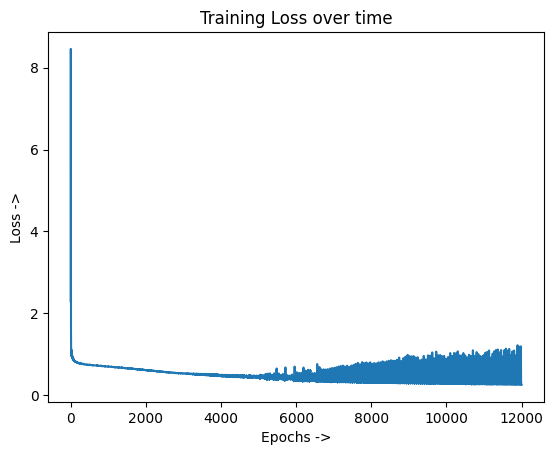

In [11]:
# Training phase
err = []
epochs = 12000

# Training loop
for i in range(epochs):
    output = NN.ForwardProp(x_train)
    NN.BackProp(x_train, y_train_one_hot)

    # Calculate loss using cross-entropy with added epsilon
    epsilon = 1e-10  # A small value to avoid log(0)
    loss = np.mean(-np.sum(y_train_one_hot * np.log(output + epsilon), axis=1))
    err.append(loss)

    if i % 100 == 0:
        print(f'Epoch {i}, Loss: {loss}')

# Plot training loss over time
plt.plot(err)
plt.xlabel('Epochs ->')
plt.ylabel('Loss ->')
plt.title('Training Loss over time')
plt.show()

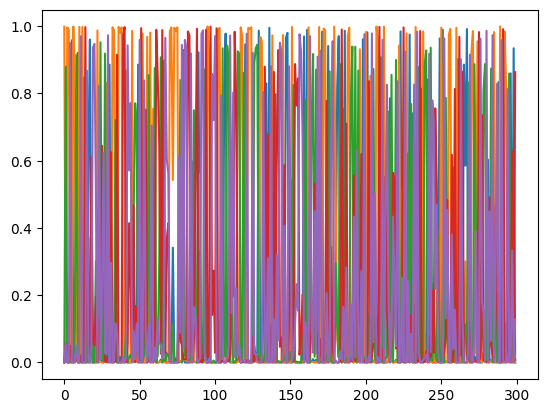

In [13]:
# testing
yPred = NN.ForwardProp(x_test)
plt.plot(yPred)


**Testing the Model**
--
For testing, we use a few inputs to make predictions and visualize the results. Here is an example where we test the model on one sample and plot the predicted class probabilities:

In [15]:
# test 1:
rainfall = 10  # (Rainfall in mm)
temperature = 10  #  (Temperature in °C)
test_input = np.array([[rainfall, temperature]])


test_output = NN.ForwardProp(test_input)


predicted_class = np.argmax(test_output)

# Print the class probabilities
print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test_output[0][i]:.4f}")

# Print predicted class with its probability
print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test_output[0][predicted_class]:.4f})")


Classes with Probabilities:

Class 1 (Wheat: (1)): 0.8939
Class 2 (Rice: (2)): 0.0000
Class 3 (Maize: (3)): 0.1060
Class 4 (Barley: (4)): 0.0001
Class 5 (Sugarcane: (5)): 0.0000

Predicted Class:
Wheat: (1) (0.8939)


In [17]:
# test 2:
rainfall = 30  # (Rainfall in mm)
temperature = 25  #  (Temperature in °C)
test_input = np.array([[rainfall, temperature]])


test_output = NN.ForwardProp(test_input)


predicted_class = np.argmax(test_output)

# Print the class probabilities
print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test_output[0][i]:.4f}")

# Print predicted class with its probability
print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test_output[0][predicted_class]:.4f})")


Classes with Probabilities:

Class 1 (Wheat: (1)): 0.3941
Class 2 (Rice: (2)): 0.0001
Class 3 (Maize: (3)): 0.6048
Class 4 (Barley: (4)): 0.0010
Class 5 (Sugarcane: (5)): 0.0001

Predicted Class:
Maize: (3) (0.6048)


In [18]:
yPredCls = np.argmax(yPred, axis=1)

#Accuracy
accuracy = accuracy_score(y_test, yPredCls)
print("Accuracy of this model :", accuracy*100,'%')

Accuracy of this model : 87.0 %


In [19]:
#Precision
precision = precision_score(y_test, yPredCls, average='weighted')


In [20]:
#Recall
recall = recall_score(y_test, yPredCls, average='weighted')


In [21]:
#F1 Score
f1 = f1_score(y_test, yPredCls, average='weighted')


**Confusion Matrix**
--
The Confusion Matrix is a useful tool to evaluate the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives for each class, allowing us to visually assess the model's accuracy.

In this section, we compute and visualize the confusion matrix for the multi-class classification task:

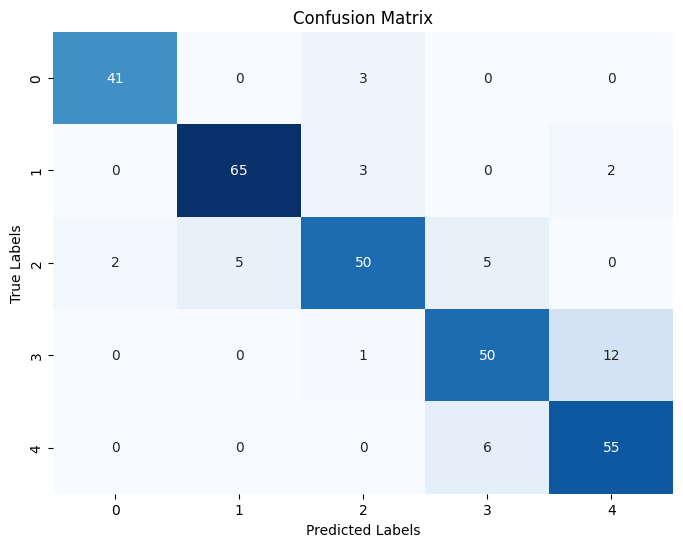

In [22]:
#Confusion Matrix
cm = confusion_matrix(y_test, yPredCls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**ROC Curve**
--
The Receiver Operating Characteristic (ROC) curve is used to evaluate the performance of a classification model. For multi-class classification, we compute the one-vs-rest ROC curve, where each class is treated as a positive class, and all other classes are treated as negative.

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for various threshold values. The Area Under the Curve (AUC) is also computed to assess the model's overall performance. A higher AUC indicates a better model.

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

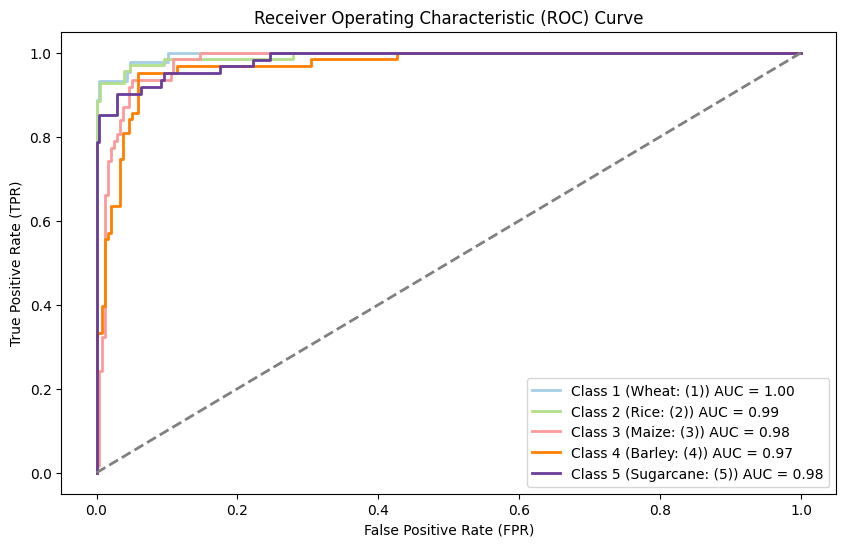

In [29]:
# Get the predicted probabilities on the test set
y_pred_prob = NN.ForwardProp(x_test)  # Predicted probabilities for each class

# Binarize the true labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
# Initialize variables for ROC curve
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(nc):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 6))

for i in range(nc):
    plt.plot(fpr[i], tpr[i], color=plt.cm.Paired(i / nc),
             lw=2, label=f'Class {i+1} ({classNames[i]}) AUC = {roc_auc[i]:.2f}')

# Plot the diagonal (random classifier) line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

**Classification Report**
--
The Classification Report provides a detailed evaluation of the model's performance for each class. It includes metrics such as precision, recall, f1-score, and accuracy for each class.

In [23]:
#Classification report
print('Classification Report:')
print(classification_report(y_test, yPredCls))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.93      0.93      0.93        70
           2       0.88      0.81      0.84        62
           3       0.82      0.79      0.81        63
           4       0.80      0.90      0.85        61

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

